# **Task 2: Simple Sales Forecasting with Moving Average**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

**lets load the data and make the data short as it is so much large**

In [3]:
df=pd.read_csv(r'c:\Users\HP\Desktop\train.csv')
print(df.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [4]:
print(df.dtypes)

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object


In [5]:
df['date']=pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


In [6]:
df['week'] = df['date'].dt.isocalendar().week

In [7]:
print(df['week'].head())

0    1
1    1
2    1
3    1
4    1
Name: week, dtype: UInt32


In [8]:
df['month']=df['date'].dt.month


In [9]:
df['year']=df['date'].dt.year
print(df['year'].head())

0    2013
1    2013
2    2013
3    2013
4    2013
Name: year, dtype: int32


**Forecasting means:**  
**Using past behaviour to estimate likely future behaviour** 
* moving average is the **simplest honest forecast**

In real life data:  
* there are lots of noise, several spikes, driven by certain factors according to the field of data taken from.
* **Raw data doesn't show the trend correctly**  

**moving average :**  
* it tells if we ignore daily noise, what direction are we moving.  
* it smoothens the choas.

**time window**  
* how much past or time can we consider or trust to predict the future.

moving averages work on **one ordered sequence**  multiple stores/category mixed together results in meaningless trend  
**so lets dug deeper and select**  
* one store, one product family, one continuous date range.

In [18]:
# now lets make a clear precise data for average rolling sales
data = df[(df['year'] == 2013) & (df['store_nbr'] == 1)]

new_family = ['FROZEN FOODS', 'EGGS']
data = data[(data['family'].isin(new_family))]
data = data.groupby('week', as_index=False)['sales'].mean().reset_index(drop=True)
data = data.sort_values('week')
data['4_week_rolling_avg'] =data['sales'].rolling(window=4).mean()
print(data)

    week       sales  4_week_rolling_avg
0      1  141.488436                 NaN
1      2  109.481857                 NaN
2      3  114.082143                 NaN
3      4  102.792429          116.961216
4      5  106.213143          108.142393
5      6  103.575714          106.665857
6      7   91.298857          100.970036
7      8  108.554714          102.410607
8      9  111.076786          103.626518
9     10  113.210929          106.035321
10    11  114.627571          111.867500
11    12  123.050143          115.491357
12    13  106.246071          114.283679
13    14  137.142857          120.266661
14    15  126.430857          123.217482
15    16  128.379428          124.549803
16    17  129.648857          130.400500
17    18  114.000000          124.614786
18    19  123.171000          123.799821
19    20  122.310357          122.282554
20    21   97.857143          114.334625
21    22  126.298071          117.409143
22    23  131.856857          119.580607
23    24  132.05

**now we have prepare the proper datset for the 4 week rolling average of sales from the store_nbr 1 in the year 2013 for the family 'FROZEN FOODS' AND 'EGGS' and selected only the weeks and the average sales for them now lets visualize the chart and find the hidden patterns.**

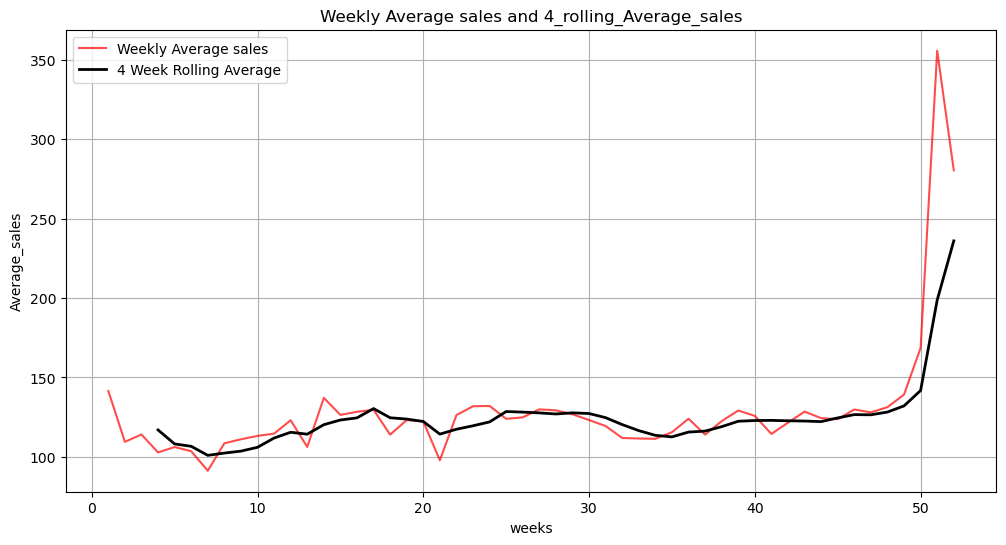

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='week', y='sales', label='Weekly Average sales', alpha=0.7, color='red').grid(True)
sns.lineplot(data=data, x='week', y='4_week_rolling_avg', label='4 Week Rolling Average', linewidth=2, alpha=1, color='black')
plt.title('Weekly Average sales and 4_rolling_Average_sales')
plt.xlabel('weeks')
plt.ylabel('Average_sales')
plt.legend()
plt.show()


**now we can clearly see the average performance by the week and after applying the 4_week_rolling_average for the frozen foods and eggs it has clearly reduce many noises and it shows much clear and exact trends.**

**lets draw it without rolling average**

In [30]:
data2 = df[(df['year'] == 2013) & (df['store_nbr'] == 1)].reset_index(drop=True)

new_family = ['FROZEN FOODS', 'EGGS']
data2 = data2[(data2['family'].isin(new_family))].reset_index(drop=True)
data2 = data2.groupby('week', as_index=False)['sales'].mean()
print(data2.head(20))

    week       sales
0      1  141.488436
1      2  109.481857
2      3  114.082143
3      4  102.792429
4      5  106.213143
5      6  103.575714
6      7   91.298857
7      8  108.554714
8      9  111.076786
9     10  113.210929
10    11  114.627571
11    12  123.050143
12    13  106.246071
13    14  137.142857
14    15  126.430857
15    16  128.379428
16    17  129.648857
17    18  114.000000
18    19  123.171000
19    20  122.310357


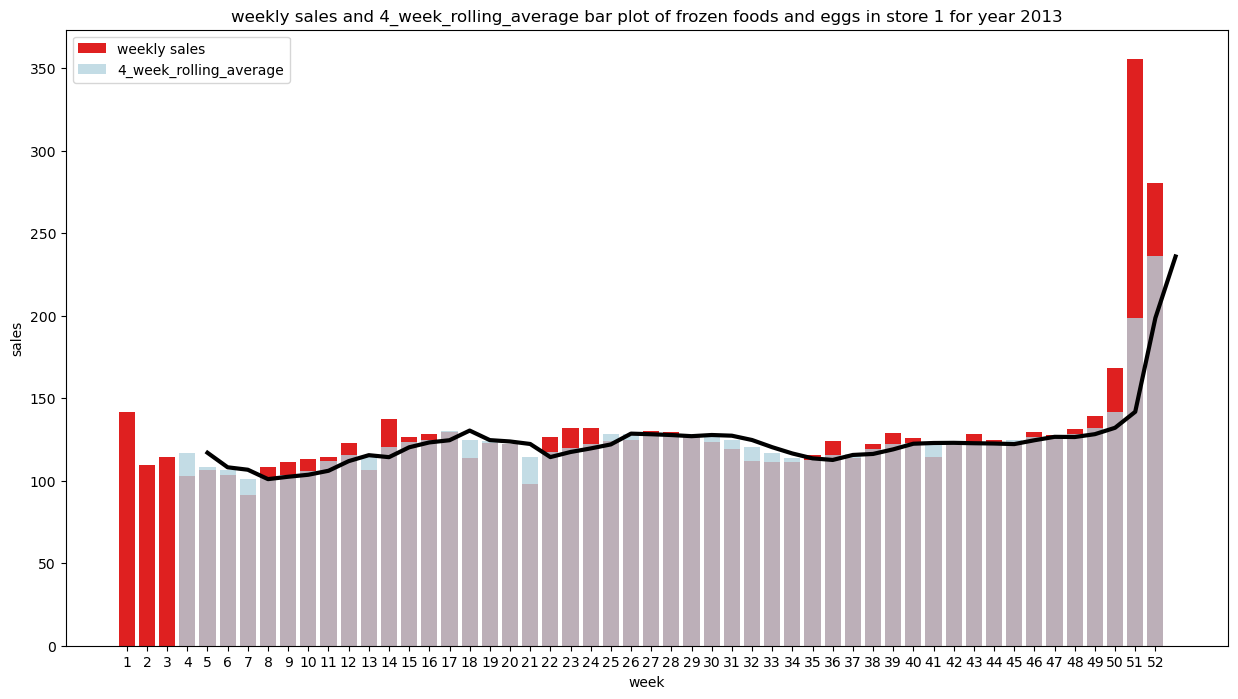

In [46]:
plt.figure(figsize=(15,8))

sns.barplot(data=data2, x='week', y='sales', color='red', alpha=1, label='weekly sales')
sns.barplot(data=data, x='week', y='4_week_rolling_avg', color='lightblue', alpha=0.8, label='4_week_rolling_average')
sns.lineplot(data=data, x='week', y='4_week_rolling_avg', color='black', linewidth=3)
plt.title('weekly sales and 4_week_rolling_average bar plot of frozen foods and eggs in store 1 for year 2013')
plt.show()

**from compairing two different plots we can clearly see that there is a lot of noise or random peaks and the real trend is much different than the overall individual raw trend**